In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search


lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

### Load data

In [ ]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search


lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

In [35]:
ii = range(10,79)
fnames = [r'/home/data_transfer/data_from_windows/20191130/Bead1/DMdata/DMdata_{}.h5'.format(i) for i in ii]
bdfs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

<IPython.core.display.Javascript object>


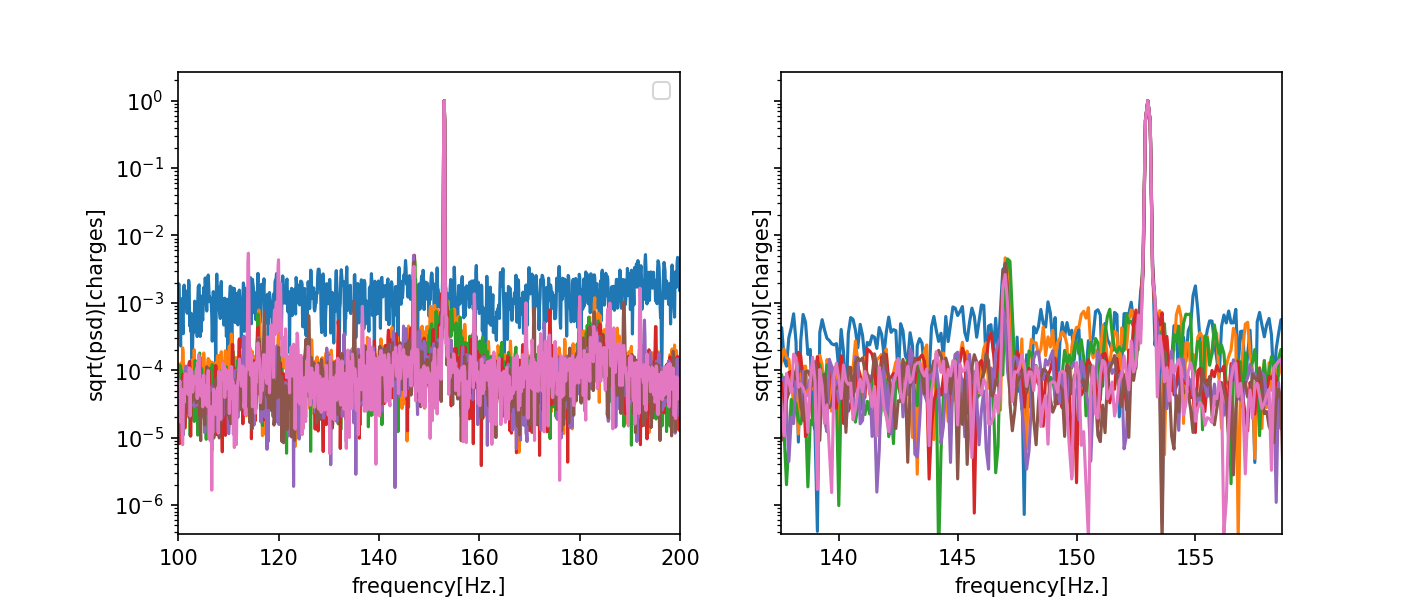

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (100, 200),
 Text(0.5, 0, 'frequency[Hz.]')]

In [62]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True)
for bb, bb1 in zip(bdfs[::10], bdfs[1::10]):
    fft2, freq2 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft2 /= fft2[freq2==153]
    
#     fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=5000)
    fft3, freq3 = matplotlib.mlab.csd(bb.x2, bb1.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax[0].semilogy(freq2, np.sqrt(fft2))
    ax[1].semilogy(freq3, np.sqrt(fft3))
ax[0].legend()
ax[0].set(xlim=(100,200), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')
ax[1].set(xlim=(100,200), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')

In [37]:
DManalyzer.BDFs = bdfs
DManalyzer.estimate_noise()

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  8.888202662598067
x3 noise rms:  2.931216183331873


In [38]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3
limit_1Hz = DManalyzer.get_sensitivity(alpha_frequency=1, bandwidth=10, frequency=153)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  8.700940661170142
x3 noise rms:  2.9703227910959162
***************************************************
bdf_i:  0 , AM frequency:  1
sensitivity:  4.95e-04
***************************************************
bdf_i:  1 , AM frequency:  1
sensitivity:  1.03e-03
***************************************************
bdf_i:  2 , AM frequency:  1
sensitivity:  5.38e-04
***************************************************
bdf_i:  3 , AM frequency:  1
sensitivity:  3.30e-04
***************************************************
bdf_i:  4 , AM frequency:  1
sensitivity:  5.48e-04
***************************************************
bdf_i:  5 , AM frequency:  1
sensitivity:  1.18e-03
***************************************************
bdf_i:  6 , AM frequency:  1
sensitivity:  6.29e-04
***************************************************
bdf_i:  7 , AM frequency:  1
sensitivity:  1.21e-03
***************************************************
bdf_i:  8 , AM frequency:  1
sensitivity:  1.38e-

In [40]:
resp_x2 = np.array([np.std(bb.response_at_freq2('x',drive_freq=153)*50000) for bb in DManalyzer.BDFs])
resp_x3 = np.array([np.std(bb.response_at_freq3('x',drive_freq=153)/6) for bb in DManalyzer.BDFs])

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


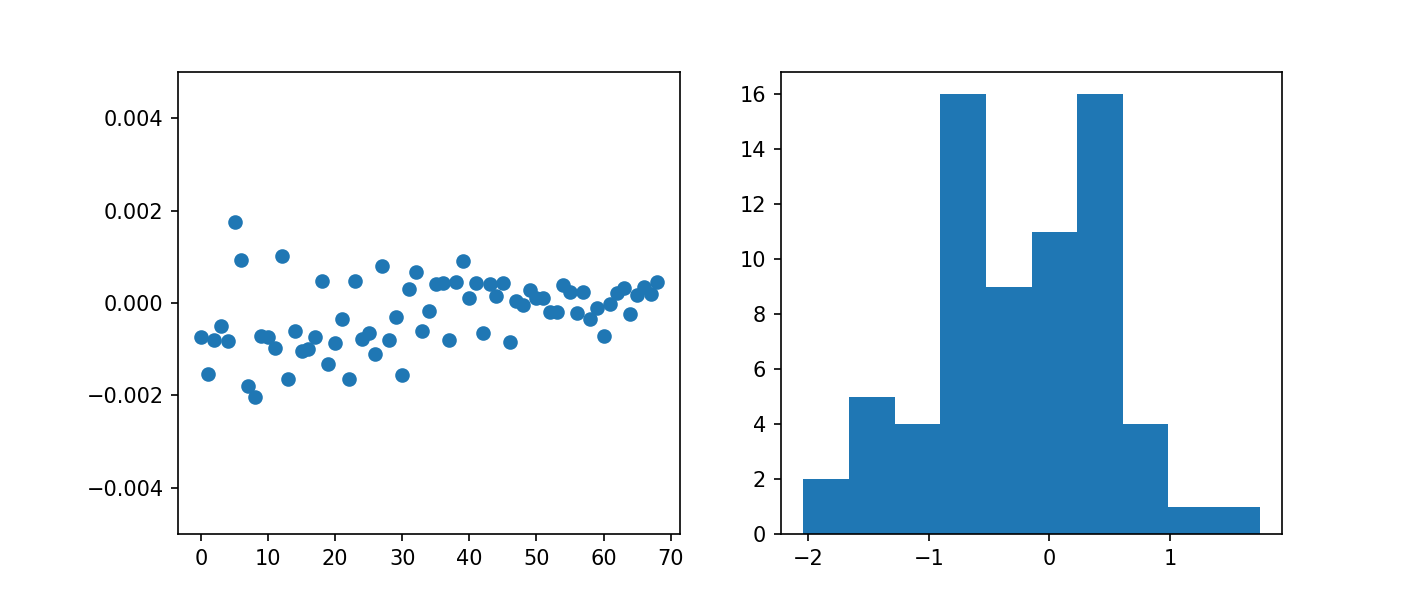

avergae:  -0.0002444579634739972 std:  0.0007472993217528799
standard error:  8.996426635963717e-05


In [45]:
A = [res_.values[0] for res_ in DManalyzer.minimizer_2d_results]
Phi = [res_.values[4] for res_ in DManalyzer.minimizer_2d_results]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(A)),A/resp_x3)
ax[0].set(ylim=(-0.005,0.005))
ax[1].hist(A/resp_x3*1000)
all_vals = A/resp_x3
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))

<IPython.core.display.Javascript object>


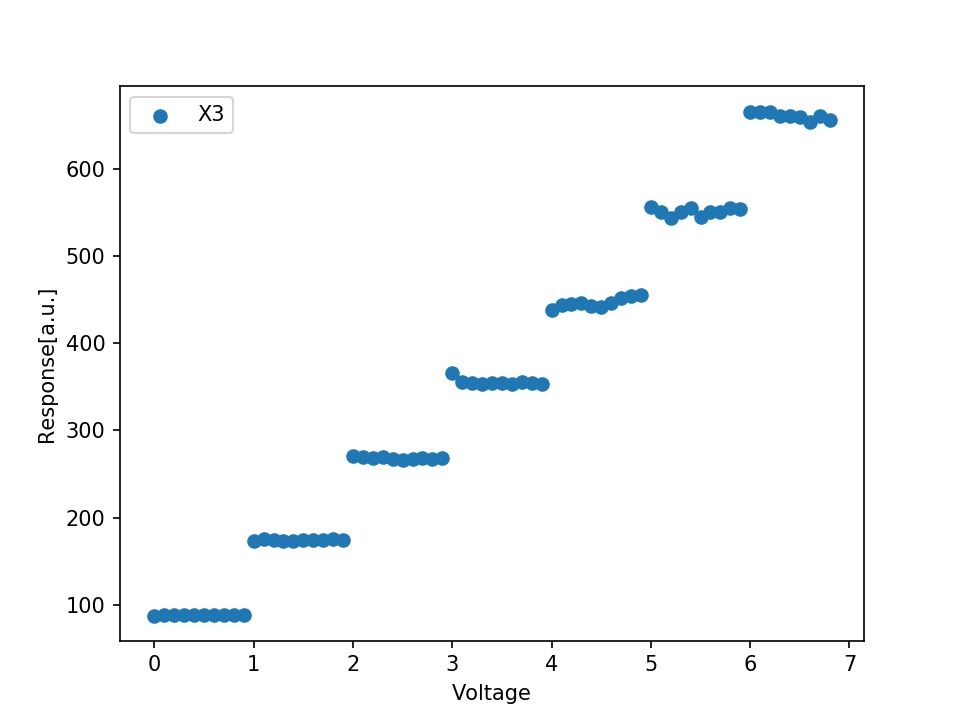

In [51]:
_,ax = plt.subplots()
# ax.scatter(np.arange(len(resp_x2))/10,resp_x2, label='X2',)
ax.scatter(np.arange(len(resp_x3))/10,resp_x3, label='X3')
ax.set(xlabel='Voltage', ylabel='Response[a.u.]')
ax.legend()